# Exploratory data analysis of global terrorism dataset
# **Author : Simran Mohata**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import terrorism dataset
terrorism_df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding= 'latin1')

C:\Users\mohat\AppData\Local\Temp\ipykernel_14628\2680185661.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding= 'latin1')


In [4]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terrorism_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Data Cleaning

In [6]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 181691 rows and 135 columns in the dataset


In [7]:
#view all the columns in the data frame
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
#number of unique columns
No_of_cols=terrorism_df.columns.nunique()
print(No_of_cols)

135


In [9]:
#let's rename some important columns
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [10]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [11]:
#our new dataframe
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [12]:
#Fill NaN values in Target_subtype column as Others
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')
#Fill NaN values in the State column as Unknown
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')
#Fill NaN values in the city column as Unknown
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [13]:
terrorism_df.shape

(181691, 12)

In [14]:
#Check for null values.
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

#### There are no null values over the entire data

In [15]:
#top 10 rows of data.
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [16]:
 #unique column names
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [17]:
#Number of columns in the dataset
terrorism_df.columns.nunique()

12

In [18]:
#total number of countries(unique)
Total_countries=terrorism_df['Country'].nunique()
print(Total_countries)

205


In [19]:
print(terrorism_df['Region'].nunique())

12


In [20]:
print(terrorism_df['Attack_type'].unique())
print(terrorism_df['Attack_type'].nunique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
9


#### there are total 9 ways in which countries were attacked

In [21]:
print(terrorism_df['Target_type'].unique())
print(terrorism_df['Target_type'].nunique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
22


In [22]:
print(terrorism_df['Gang_name'].unique())
print(terrorism_df['Gang_name'].nunique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
3537


#### There was a total of 3537 gangs in this dataset

In [23]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [24]:
#View info

terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [25]:
terrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [26]:
# top 10 affected countries

terrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [27]:
#top 10 affected regions

terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [28]:
#top 10 affected states

terrorism_df['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [29]:
terrorism_df['Target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Target_subtype, dtype: int64

In [30]:
#top 10 affected cities

terrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

In [31]:
#top 10 chosen attacking modes

terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [32]:
# top 10 targets to attack

terrorism_df['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

In [33]:
#top 10 leading and most dangerous gangs

terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

# Visualization

<AxesSubplot:xlabel='Weapon_type', ylabel='count'>

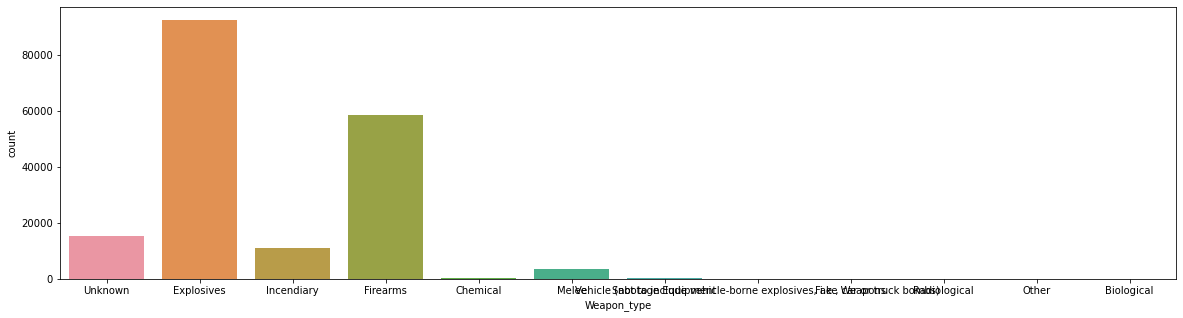

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(x=terrorism_df.Weapon_type)

#### Most of the attacks were attacked through explosives and then through firearms

<AxesSubplot:title={'center':'Attacks by Year'}, xlabel='Year', ylabel='count'>

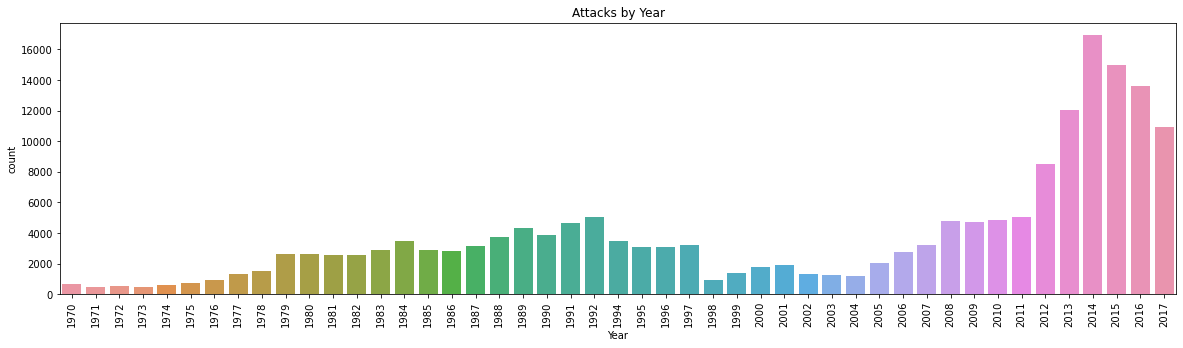

In [35]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.Year)

#### Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

<AxesSubplot:title={'center':'Attacks by Month'}, xlabel='Month', ylabel='count'>

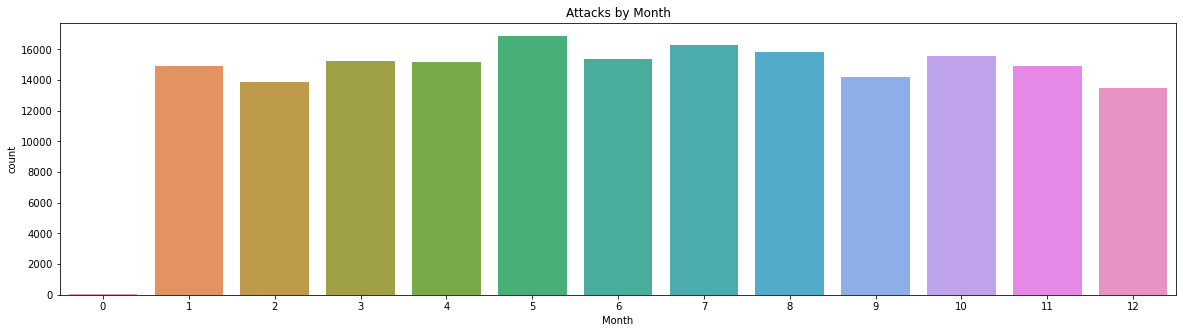

In [37]:
plt.figure(figsize=(20,5))
plt.title('Attacks by Month')
sns.countplot(x=terrorism_df.Month)

#### Almost every month has the same contribution

<AxesSubplot:title={'center':'Attacks by Day'}, xlabel='Day', ylabel='count'>

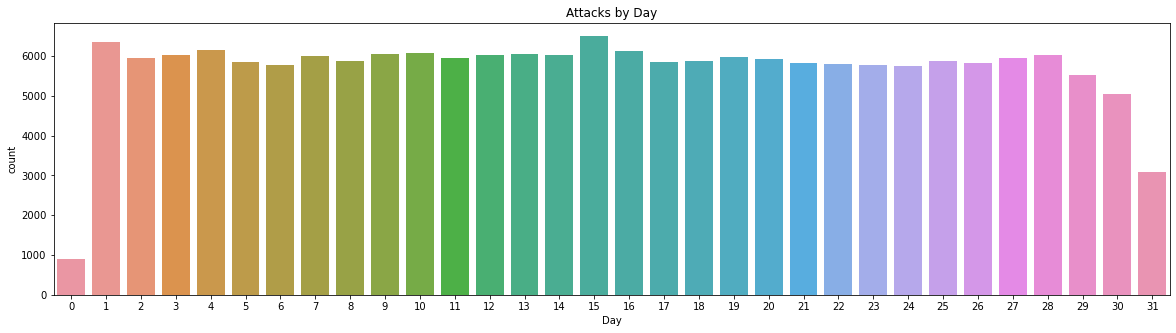

In [38]:
plt.figure(figsize=(20,5))
plt.title('Attacks by Day')
sns.countplot(x=terrorism_df.Day)

#### Almost every day has the same contribution but attacks were low on 31st and high on 15th and 1st.

<AxesSubplot:title={'center':'Attacks by Country'}, xlabel='Country', ylabel='count'>

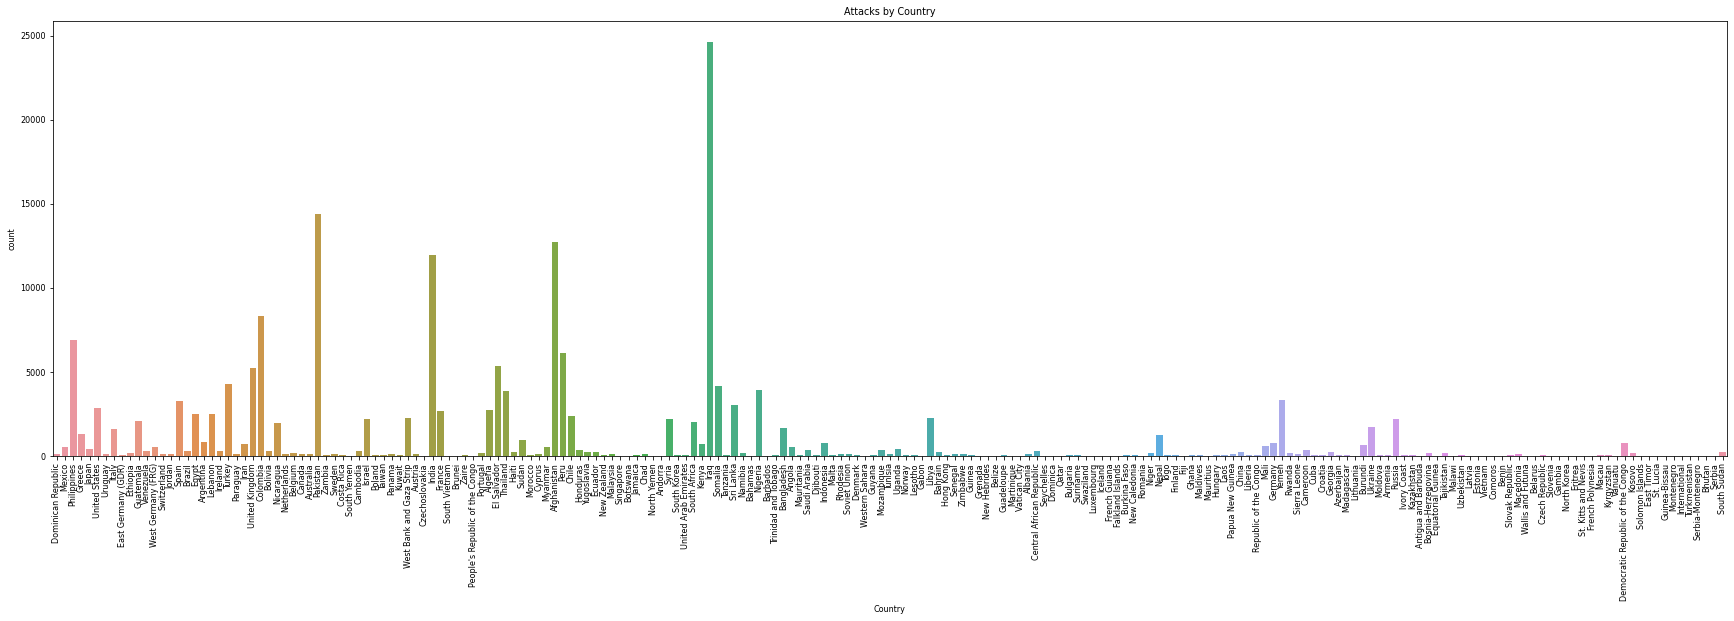

In [42]:
plt.figure(figsize=(30,8))
plt.rcParams.update({'font.size':8})
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Country)

#### Amongst all the countries Iraq has seen the highest number of attacks followed by Pakistan, Afghanistan, and India. Government should increase safety measures in these countries. 

<AxesSubplot:title={'center':'Attacks by Region'}, xlabel='Region', ylabel='count'>

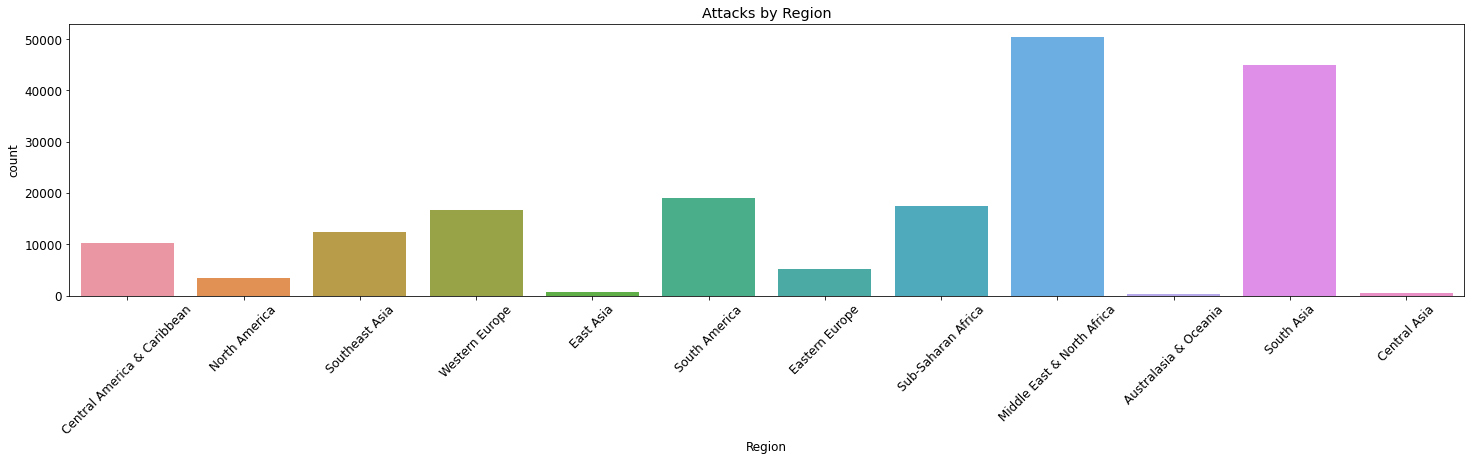

In [48]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12})
plt.xticks(rotation = 45)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df.Region)

#### The Middle East & North Africa leads 1st among all the regions and then South Asia takes 2nd place. 

<AxesSubplot:title={'center':'Based on Target type'}, xlabel='Target_type', ylabel='count'>

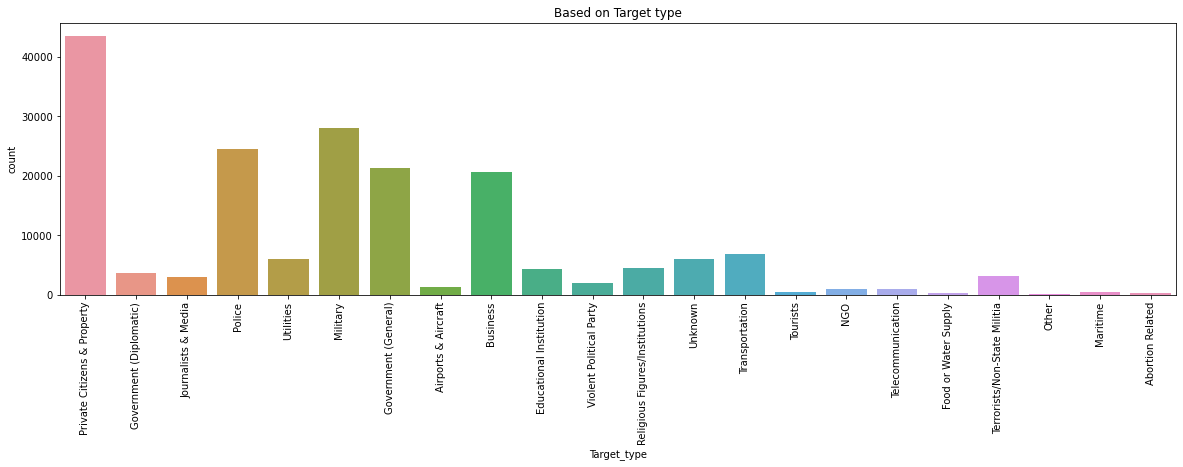

In [49]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=terrorism_df.Target_type)

#### According to the trends the main target of attack is Private Citizens & property and then next Military leads. One reason behind this could be that terrorists probably feel that it is the civilians who have control over those who rule.

<AxesSubplot:title={'center':'Based on Attack type'}, xlabel='Attack_type', ylabel='count'>

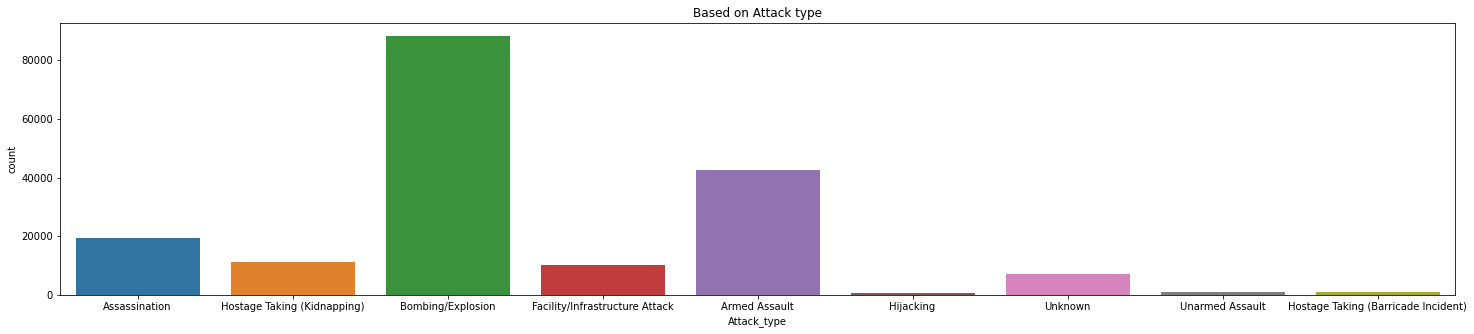

In [51]:
plt.figure(figsize=(25,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism_df.Attack_type)

#### Most of the attacks were through either Bombing or Explosion. This shows how dangerous weapons and explosives are to the world.